In [1]:
import os, sys
import cv2
import numpy as np
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import InputLayer, MaxPooling2D, Conv2D, Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
def get_data_from_file(train_file):
    train_data = []
    # enter your code here (7 points)
    with open(train_file) as fp:
        lines = fp.readlines()
        # print(lines)
    for k,line in enumerate(lines):
        print('{:6d} /{:6d}'.format(k+1, len(lines)), end='\r')
        img_path = line.strip()
        try:
            train = 'train'
            img = cv2.imread(os.path.join(train, img_path))
            img_resized = cv2.resize(img, (48, 48))
            if 'cat' in line:
                label = 0
            elif 'dog' in line:
                label = 1
            else:
                continue
            train_data.append([img_resized, label])
        except Exception as e:
            print("Error: ", e)
            continue
    return train_data

In [3]:
def get_image_and_label(train_data):
    # enter your code here (8 points)
    num_X = len(train_data)
    X_train = np.zeros((num_X, 48, 48, 3))
    Y_train = np.zeros(num_X)    
    for i, data in enumerate(train_data):
        image, label = data
        X_train[i] = image
        Y_train[i] = label        
    return X_train, Y_train

In [4]:
def assignment4b_1():
    train_file = 'train_list.txt'
    test_file = 'test_list.txt'
    train_data = get_data_from_file(train_file)
    X_train, Y_train = get_image_and_label(train_data)
    print()  
    test_data = get_data_from_file(test_file)
    X_test, Y_test = get_image_and_label(test_data)
    print()
    print(len(train_data))
    print(train_data[0][0].shape)
    print(len(test_data))
    print(test_data[0][0].shape)

    save_path = 'dogs_cats.pkl'
    print('Saving to', save_path)
    data = {}
    data['X_train'] = X_train
    data['Y_train'] = Y_train
    data['X_test'] = X_test
    data['Y_test'] = Y_test
    pickle.dump(data, open(save_path, 'wb'))

In [5]:
def build_model():
    # enter your code here, and remove the following pass (15 points)
    model = keras.Sequential([
        InputLayer(input_shape=(48, 48, 3)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(2, activation='softmax')
    ]) 
    return model

In [6]:
def assignment4b_2():
    data = pickle.load(open("dogs_cats.pkl","rb"))
    X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    model = build_model()
    model.summary()
    model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    ck_dir = "ckpt_dogcat"
    checkpoint_path = ck_dir+"/cp-{epoch:04d}.ckpt"
    cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1, save_freq=10)
    batch_size = 64
    epochs = 60
    # enter your code here (5 points)
    history = model.fit(X_train, Y_train, epochs, batch_size, callbacks=[cp_callback], validation_split=0.1, shuffle=True)
    test_loss, test_acc = model.evaluate(X_test, Y_test)
    print("Test accuracy:", test_acc)
    with open('history.pkl', 'wb') as f:
        pickle.dump(history.history, f)

In [7]:
def assignment4b_3():
    # enter your code here, and remove the following pass (5 points)
    with open('history.pkl', 'rb') as f:
        history = pickle.load(f)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [8]:
def assignment4b_4():
    # enter your code here, and remove the following pass (5 points)
    data = pickle.load(open("dogs_cats.pkl","rb"))
    _, _, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
    X_test = X_test / 255.0
    ck_dir = "ckpt_dogcat"
    model = build_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    test_accs = []
    epochs_evaluate = [10, 20, 30, 40, 50, 60]
    for epoch in epochs_evaluate:
        checkpoint_path = ck_dir + "/cp-{epoch:04d}.ckpt".format(epoch=epoch)
        model.load_weights(checkpoint_path)
        test_loss, test_acc = model.evaluate(X_test, Y_test)
        print("Test accuracy at epoch", epoch, ":", test_acc)
        test_accs.append(test_acc)

In [9]:
if __name__ == '__main__':
    assignment4b_1() # do not modify this line

 20000 / 20000
  5000 /  5000
20000
(48, 48, 3)
5000
(48, 48, 3)
Saving to dogs_cats.pkl


In [10]:
    assignment4b_2() # do not modify this line

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

179/300 [================>.............] - ETA: 5s - loss: 0.5391 - accuracy: 0.7281
Epoch 2: saving model to ckpt_dogcat\cp-0002.ckpt
189/300 [=================>............] - ETA: 5s - loss: 0.5381 - accuracy: 0.7283
Epoch 2: saving model to ckpt_dogcat\cp-0002.ckpt
199/300 [==================>...........] - ETA: 4s - loss: 0.5378 - accuracy: 0.7286
Epoch 2: saving model to ckpt_dogcat\cp-0002.ckpt
208/300 [===================>..........] - ETA: 4s - loss: 0.5359 - accuracy: 0.7303
Epoch 2: saving model to ckpt_dogcat\cp-0002.ckpt
219/300 [====================>.........] - ETA: 3s - loss: 0.5351 - accuracy: 0.7308
Epoch 2: saving model to ckpt_dogcat\cp-0002.ckpt
229/300 [=====================>........] - ETA: 3s - loss: 0.5333 - accuracy: 0.7323
Epoch 2: saving model to ckpt_dogcat\cp-0002.ckpt
238/300 [======================>.......] - ETA: 3s - loss: 0.5323 - accuracy: 0.7331
Epoch 2: saving model to ckpt_dogcat\cp-0002.ckpt
249/300 [=======================>......] - ETA: 2s - lo

159/300 [==============>...............] - ETA: 7s - loss: 0.4409 - accuracy: 0.7940
Epoch 4: saving model to ckpt_dogcat\cp-0004.ckpt
169/300 [===============>..............] - ETA: 6s - loss: 0.4430 - accuracy: 0.7933
Epoch 4: saving model to ckpt_dogcat\cp-0004.ckpt
179/300 [================>.............] - ETA: 6s - loss: 0.4430 - accuracy: 0.7938
Epoch 4: saving model to ckpt_dogcat\cp-0004.ckpt
188/300 [=================>............] - ETA: 5s - loss: 0.4423 - accuracy: 0.7940
Epoch 4: saving model to ckpt_dogcat\cp-0004.ckpt
198/300 [==================>...........] - ETA: 5s - loss: 0.4413 - accuracy: 0.7944
Epoch 4: saving model to ckpt_dogcat\cp-0004.ckpt
209/300 [===================>..........] - ETA: 4s - loss: 0.4402 - accuracy: 0.7957
Epoch 4: saving model to ckpt_dogcat\cp-0004.ckpt
219/300 [====================>.........] - ETA: 4s - loss: 0.4409 - accuracy: 0.7945
Epoch 4: saving model to ckpt_dogcat\cp-0004.ckpt
229/300 [=====================>........] - ETA: 3s - lo

138/300 [============>.................] - ETA: 8s - loss: 0.3896 - accuracy: 0.8251
Epoch 6: saving model to ckpt_dogcat\cp-0006.ckpt
148/300 [=============>................] - ETA: 7s - loss: 0.3892 - accuracy: 0.8243
Epoch 6: saving model to ckpt_dogcat\cp-0006.ckpt
159/300 [==============>...............] - ETA: 7s - loss: 0.3872 - accuracy: 0.8241
Epoch 6: saving model to ckpt_dogcat\cp-0006.ckpt
169/300 [===============>..............] - ETA: 6s - loss: 0.3875 - accuracy: 0.8246
Epoch 6: saving model to ckpt_dogcat\cp-0006.ckpt
178/300 [================>.............] - ETA: 6s - loss: 0.3888 - accuracy: 0.8243
Epoch 6: saving model to ckpt_dogcat\cp-0006.ckpt
189/300 [=================>............] - ETA: 5s - loss: 0.3888 - accuracy: 0.8244
Epoch 6: saving model to ckpt_dogcat\cp-0006.ckpt
198/300 [==================>...........] - ETA: 5s - loss: 0.3867 - accuracy: 0.8247
Epoch 6: saving model to ckpt_dogcat\cp-0006.ckpt
209/300 [===================>..........] - ETA: 4s - lo

119/300 [==========>...................] - ETA: 9s - loss: 0.3423 - accuracy: 0.8478
Epoch 8: saving model to ckpt_dogcat\cp-0008.ckpt
129/300 [===========>..................] - ETA: 8s - loss: 0.3441 - accuracy: 0.8474
Epoch 8: saving model to ckpt_dogcat\cp-0008.ckpt
138/300 [============>.................] - ETA: 8s - loss: 0.3433 - accuracy: 0.8475
Epoch 8: saving model to ckpt_dogcat\cp-0008.ckpt
149/300 [=============>................] - ETA: 7s - loss: 0.3432 - accuracy: 0.8474
Epoch 8: saving model to ckpt_dogcat\cp-0008.ckpt
158/300 [==============>...............] - ETA: 7s - loss: 0.3452 - accuracy: 0.8457
Epoch 8: saving model to ckpt_dogcat\cp-0008.ckpt
168/300 [===============>..............] - ETA: 6s - loss: 0.3456 - accuracy: 0.8451
Epoch 8: saving model to ckpt_dogcat\cp-0008.ckpt
178/300 [================>.............] - ETA: 6s - loss: 0.3455 - accuracy: 0.8449
Epoch 8: saving model to ckpt_dogcat\cp-0008.ckpt
189/300 [=================>............] - ETA: 5s - lo

 98/300 [========>.....................] - ETA: 9s - loss: 0.3053 - accuracy: 0.8673
Epoch 10: saving model to ckpt_dogcat\cp-0010.ckpt
109/300 [=========>....................] - ETA: 9s - loss: 0.3047 - accuracy: 0.8679
Epoch 10: saving model to ckpt_dogcat\cp-0010.ckpt
118/300 [==========>...................] - ETA: 8s - loss: 0.3040 - accuracy: 0.8682
Epoch 10: saving model to ckpt_dogcat\cp-0010.ckpt
128/300 [===========>..................] - ETA: 8s - loss: 0.3041 - accuracy: 0.8687
Epoch 10: saving model to ckpt_dogcat\cp-0010.ckpt
139/300 [============>.................] - ETA: 7s - loss: 0.3031 - accuracy: 0.8697
Epoch 10: saving model to ckpt_dogcat\cp-0010.ckpt
149/300 [=============>................] - ETA: 7s - loss: 0.3035 - accuracy: 0.8687
Epoch 10: saving model to ckpt_dogcat\cp-0010.ckpt
159/300 [==============>...............] - ETA: 6s - loss: 0.3038 - accuracy: 0.8678
Epoch 10: saving model to ckpt_dogcat\cp-0010.ckpt
169/300 [===============>..............] - ETA: 

 79/300 [======>.......................] - ETA: 11s - loss: 0.2622 - accuracy: 0.8916
Epoch 12: saving model to ckpt_dogcat\cp-0012.ckpt
 88/300 [=======>......................] - ETA: 10s - loss: 0.2601 - accuracy: 0.8917
Epoch 12: saving model to ckpt_dogcat\cp-0012.ckpt
 98/300 [========>.....................] - ETA: 10s - loss: 0.2631 - accuracy: 0.8917
Epoch 12: saving model to ckpt_dogcat\cp-0012.ckpt
109/300 [=========>....................] - ETA: 9s - loss: 0.2640 - accuracy: 0.8902
Epoch 12: saving model to ckpt_dogcat\cp-0012.ckpt
118/300 [==========>...................] - ETA: 9s - loss: 0.2626 - accuracy: 0.8903
Epoch 12: saving model to ckpt_dogcat\cp-0012.ckpt
129/300 [===========>..................] - ETA: 8s - loss: 0.2605 - accuracy: 0.8911
Epoch 12: saving model to ckpt_dogcat\cp-0012.ckpt
139/300 [============>.................] - ETA: 8s - loss: 0.2636 - accuracy: 0.8894
Epoch 12: saving model to ckpt_dogcat\cp-0012.ckpt
149/300 [=============>................] - ET

 58/300 [====>.........................] - ETA: 11s - loss: 0.2287 - accuracy: 0.9092
Epoch 14: saving model to ckpt_dogcat\cp-0014.ckpt
 68/300 [=====>........................] - ETA: 11s - loss: 0.2308 - accuracy: 0.9064
Epoch 14: saving model to ckpt_dogcat\cp-0014.ckpt
 78/300 [======>.......................] - ETA: 10s - loss: 0.2302 - accuracy: 0.9062
Epoch 14: saving model to ckpt_dogcat\cp-0014.ckpt
 89/300 [=======>......................] - ETA: 10s - loss: 0.2300 - accuracy: 0.9066
Epoch 14: saving model to ckpt_dogcat\cp-0014.ckpt
 99/300 [========>.....................] - ETA: 9s - loss: 0.2322 - accuracy: 0.9044
Epoch 14: saving model to ckpt_dogcat\cp-0014.ckpt
109/300 [=========>....................] - ETA: 9s - loss: 0.2356 - accuracy: 0.9023
Epoch 14: saving model to ckpt_dogcat\cp-0014.ckpt
119/300 [==========>...................] - ETA: 8s - loss: 0.2377 - accuracy: 0.9007
Epoch 14: saving model to ckpt_dogcat\cp-0014.ckpt
128/300 [===========>..................] - E

 39/300 [==>...........................] - ETA: 12s - loss: 0.2118 - accuracy: 0.9154
Epoch 16: saving model to ckpt_dogcat\cp-0016.ckpt
 49/300 [===>..........................] - ETA: 12s - loss: 0.2066 - accuracy: 0.9187
Epoch 16: saving model to ckpt_dogcat\cp-0016.ckpt
 59/300 [====>.........................] - ETA: 11s - loss: 0.2008 - accuracy: 0.9215
Epoch 16: saving model to ckpt_dogcat\cp-0016.ckpt
 68/300 [=====>........................] - ETA: 11s - loss: 0.1988 - accuracy: 0.9218
Epoch 16: saving model to ckpt_dogcat\cp-0016.ckpt
 79/300 [======>.......................] - ETA: 10s - loss: 0.2028 - accuracy: 0.9196
Epoch 16: saving model to ckpt_dogcat\cp-0016.ckpt
 88/300 [=======>......................] - ETA: 10s - loss: 0.2014 - accuracy: 0.9208
Epoch 16: saving model to ckpt_dogcat\cp-0016.ckpt
 99/300 [========>.....................] - ETA: 9s - loss: 0.2020 - accuracy: 0.9199
Epoch 16: saving model to ckpt_dogcat\cp-0016.ckpt
108/300 [=========>....................] -

 18/300 [>.............................] - ETA: 12s - loss: 0.1592 - accuracy: 0.9380
Epoch 18: saving model to ckpt_dogcat\cp-0018.ckpt
 29/300 [=>............................] - ETA: 12s - loss: 0.1666 - accuracy: 0.9310
Epoch 18: saving model to ckpt_dogcat\cp-0018.ckpt
 39/300 [==>...........................] - ETA: 12s - loss: 0.1755 - accuracy: 0.9269
Epoch 18: saving model to ckpt_dogcat\cp-0018.ckpt
 49/300 [===>..........................] - ETA: 11s - loss: 0.1735 - accuracy: 0.9303
Epoch 18: saving model to ckpt_dogcat\cp-0018.ckpt
 58/300 [====>.........................] - ETA: 11s - loss: 0.1724 - accuracy: 0.9319
Epoch 18: saving model to ckpt_dogcat\cp-0018.ckpt
 69/300 [=====>........................] - ETA: 11s - loss: 0.1737 - accuracy: 0.9333
Epoch 18: saving model to ckpt_dogcat\cp-0018.ckpt
 79/300 [======>.......................] - ETA: 10s - loss: 0.1744 - accuracy: 0.9323
Epoch 18: saving model to ckpt_dogcat\cp-0018.ckpt
 89/300 [=======>......................] 

300/300 [==============================] - 15s 50ms/step - loss: 0.1733 - accuracy: 0.9304 - val_loss: 0.4608 - val_accuracy: 0.8185
Epoch 20/64
  9/300 [..............................] - ETA: 12s - loss: 0.1604 - accuracy: 0.9352
Epoch 20: saving model to ckpt_dogcat\cp-0020.ckpt
 19/300 [>.............................] - ETA: 13s - loss: 0.1646 - accuracy: 0.9307
Epoch 20: saving model to ckpt_dogcat\cp-0020.ckpt
 28/300 [=>............................] - ETA: 12s - loss: 0.1569 - accuracy: 0.9333
Epoch 20: saving model to ckpt_dogcat\cp-0020.ckpt
 39/300 [==>...........................] - ETA: 12s - loss: 0.1679 - accuracy: 0.9286
Epoch 20: saving model to ckpt_dogcat\cp-0020.ckpt
 49/300 [===>..........................] - ETA: 11s - loss: 0.1679 - accuracy: 0.9293
Epoch 20: saving model to ckpt_dogcat\cp-0020.ckpt
 58/300 [====>.........................] - ETA: 11s - loss: 0.1648 - accuracy: 0.9313
Epoch 20: saving model to ckpt_dogcat\cp-0020.ckpt
 69/300 [=====>..................

289/300 [===========================>..] - ETA: 0s - loss: 0.1530 - accuracy: 0.9384
Epoch 21: saving model to ckpt_dogcat\cp-0021.ckpt
298/300 [============================>.] - ETA: 0s - loss: 0.1546 - accuracy: 0.9378
Epoch 21: saving model to ckpt_dogcat\cp-0021.ckpt
300/300 [==============================] - 15s 50ms/step - loss: 0.1545 - accuracy: 0.9378 - val_loss: 0.5564 - val_accuracy: 0.8080
Epoch 22/64
  9/300 [..............................] - ETA: 13s - loss: 0.1609 - accuracy: 0.9333
Epoch 22: saving model to ckpt_dogcat\cp-0022.ckpt
 18/300 [>.............................] - ETA: 13s - loss: 0.1630 - accuracy: 0.9343
Epoch 22: saving model to ckpt_dogcat\cp-0022.ckpt
 29/300 [=>............................] - ETA: 12s - loss: 0.1493 - accuracy: 0.9397
Epoch 22: saving model to ckpt_dogcat\cp-0022.ckpt
 38/300 [==>...........................] - ETA: 12s - loss: 0.1426 - accuracy: 0.9461
Epoch 22: saving model to ckpt_dogcat\cp-0022.ckpt
 48/300 [===>......................

268/300 [=========================>....] - ETA: 1s - loss: 0.1269 - accuracy: 0.9522
Epoch 23: saving model to ckpt_dogcat\cp-0023.ckpt
279/300 [==========================>...] - ETA: 1s - loss: 0.1269 - accuracy: 0.9526
Epoch 23: saving model to ckpt_dogcat\cp-0023.ckpt
289/300 [===========================>..] - ETA: 0s - loss: 0.1274 - accuracy: 0.9520
Epoch 23: saving model to ckpt_dogcat\cp-0023.ckpt
298/300 [============================>.] - ETA: 0s - loss: 0.1279 - accuracy: 0.9515
Epoch 23: saving model to ckpt_dogcat\cp-0023.ckpt
300/300 [==============================] - 15s 50ms/step - loss: 0.1278 - accuracy: 0.9515 - val_loss: 0.5683 - val_accuracy: 0.8130
Epoch 24/64
  9/300 [..............................] - ETA: 12s - loss: 0.0965 - accuracy: 0.9704
Epoch 24: saving model to ckpt_dogcat\cp-0024.ckpt
 19/300 [>.............................] - ETA: 12s - loss: 0.0962 - accuracy: 0.9702
Epoch 24: saving model to ckpt_dogcat\cp-0024.ckpt
 29/300 [=>..........................

248/300 [=======================>......] - ETA: 2s - loss: 0.1046 - accuracy: 0.9622
Epoch 25: saving model to ckpt_dogcat\cp-0025.ckpt
259/300 [========================>.....] - ETA: 1s - loss: 0.1042 - accuracy: 0.9624
Epoch 25: saving model to ckpt_dogcat\cp-0025.ckpt
268/300 [=========================>....] - ETA: 1s - loss: 0.1053 - accuracy: 0.9618
Epoch 25: saving model to ckpt_dogcat\cp-0025.ckpt
279/300 [==========================>...] - ETA: 1s - loss: 0.1059 - accuracy: 0.9616
Epoch 25: saving model to ckpt_dogcat\cp-0025.ckpt
289/300 [===========================>..] - ETA: 0s - loss: 0.1072 - accuracy: 0.9606
Epoch 25: saving model to ckpt_dogcat\cp-0025.ckpt
298/300 [============================>.] - ETA: 0s - loss: 0.1077 - accuracy: 0.9605
Epoch 25: saving model to ckpt_dogcat\cp-0025.ckpt
300/300 [==============================] - 15s 50ms/step - loss: 0.1080 - accuracy: 0.9604 - val_loss: 0.6075 - val_accuracy: 0.8055
Epoch 26/64
  9/300 [..............................

229/300 [=====================>........] - ETA: 3s - loss: 0.0885 - accuracy: 0.9672
Epoch 27: saving model to ckpt_dogcat\cp-0027.ckpt
239/300 [======================>.......] - ETA: 2s - loss: 0.0899 - accuracy: 0.9664
Epoch 27: saving model to ckpt_dogcat\cp-0027.ckpt
249/300 [=======================>......] - ETA: 2s - loss: 0.0898 - accuracy: 0.9666
Epoch 27: saving model to ckpt_dogcat\cp-0027.ckpt
259/300 [========================>.....] - ETA: 2s - loss: 0.0895 - accuracy: 0.9667
Epoch 27: saving model to ckpt_dogcat\cp-0027.ckpt
269/300 [=========================>....] - ETA: 1s - loss: 0.0901 - accuracy: 0.9668
Epoch 27: saving model to ckpt_dogcat\cp-0027.ckpt
279/300 [==========================>...] - ETA: 1s - loss: 0.0909 - accuracy: 0.9667
Epoch 27: saving model to ckpt_dogcat\cp-0027.ckpt
288/300 [===========================>..] - ETA: 0s - loss: 0.0906 - accuracy: 0.9668
Epoch 27: saving model to ckpt_dogcat\cp-0027.ckpt
299/300 [============================>.] - ETA: 

208/300 [===================>..........] - ETA: 4s - loss: 0.0732 - accuracy: 0.9740
Epoch 29: saving model to ckpt_dogcat\cp-0029.ckpt
218/300 [====================>.........] - ETA: 4s - loss: 0.0743 - accuracy: 0.9731
Epoch 29: saving model to ckpt_dogcat\cp-0029.ckpt
228/300 [=====================>........] - ETA: 3s - loss: 0.0755 - accuracy: 0.9722
Epoch 29: saving model to ckpt_dogcat\cp-0029.ckpt
238/300 [======================>.......] - ETA: 3s - loss: 0.0761 - accuracy: 0.9719
Epoch 29: saving model to ckpt_dogcat\cp-0029.ckpt
248/300 [=======================>......] - ETA: 2s - loss: 0.0761 - accuracy: 0.9722
Epoch 29: saving model to ckpt_dogcat\cp-0029.ckpt
258/300 [========================>.....] - ETA: 2s - loss: 0.0762 - accuracy: 0.9722
Epoch 29: saving model to ckpt_dogcat\cp-0029.ckpt
269/300 [=========================>....] - ETA: 1s - loss: 0.0758 - accuracy: 0.9722
Epoch 29: saving model to ckpt_dogcat\cp-0029.ckpt
279/300 [==========================>...] - ETA: 

189/300 [=================>............] - ETA: 5s - loss: 0.0575 - accuracy: 0.9811
Epoch 31: saving model to ckpt_dogcat\cp-0031.ckpt
199/300 [==================>...........] - ETA: 5s - loss: 0.0571 - accuracy: 0.9813
Epoch 31: saving model to ckpt_dogcat\cp-0031.ckpt
209/300 [===================>..........] - ETA: 4s - loss: 0.0565 - accuracy: 0.9817
Epoch 31: saving model to ckpt_dogcat\cp-0031.ckpt
219/300 [====================>.........] - ETA: 4s - loss: 0.0570 - accuracy: 0.9817
Epoch 31: saving model to ckpt_dogcat\cp-0031.ckpt
229/300 [=====================>........] - ETA: 3s - loss: 0.0581 - accuracy: 0.9811
Epoch 31: saving model to ckpt_dogcat\cp-0031.ckpt
239/300 [======================>.......] - ETA: 3s - loss: 0.0577 - accuracy: 0.9814
Epoch 31: saving model to ckpt_dogcat\cp-0031.ckpt
249/300 [=======================>......] - ETA: 2s - loss: 0.0579 - accuracy: 0.9813
Epoch 31: saving model to ckpt_dogcat\cp-0031.ckpt
259/300 [========================>.....] - ETA: 

169/300 [===============>..............] - ETA: 6s - loss: 0.0487 - accuracy: 0.9860
Epoch 33: saving model to ckpt_dogcat\cp-0033.ckpt
179/300 [================>.............] - ETA: 5s - loss: 0.0491 - accuracy: 0.9858
Epoch 33: saving model to ckpt_dogcat\cp-0033.ckpt
189/300 [=================>............] - ETA: 5s - loss: 0.0494 - accuracy: 0.9856
Epoch 33: saving model to ckpt_dogcat\cp-0033.ckpt
199/300 [==================>...........] - ETA: 4s - loss: 0.0491 - accuracy: 0.9855
Epoch 33: saving model to ckpt_dogcat\cp-0033.ckpt
208/300 [===================>..........] - ETA: 4s - loss: 0.0497 - accuracy: 0.9853
Epoch 33: saving model to ckpt_dogcat\cp-0033.ckpt
219/300 [====================>.........] - ETA: 3s - loss: 0.0502 - accuracy: 0.9849
Epoch 33: saving model to ckpt_dogcat\cp-0033.ckpt
229/300 [=====================>........] - ETA: 3s - loss: 0.0508 - accuracy: 0.9847
Epoch 33: saving model to ckpt_dogcat\cp-0033.ckpt
239/300 [======================>.......] - ETA: 

148/300 [=============>................] - ETA: 7s - loss: 0.0359 - accuracy: 0.9912
Epoch 35: saving model to ckpt_dogcat\cp-0035.ckpt
159/300 [==============>...............] - ETA: 6s - loss: 0.0385 - accuracy: 0.9903
Epoch 35: saving model to ckpt_dogcat\cp-0035.ckpt
169/300 [===============>..............] - ETA: 6s - loss: 0.0389 - accuracy: 0.9901
Epoch 35: saving model to ckpt_dogcat\cp-0035.ckpt
178/300 [================>.............] - ETA: 5s - loss: 0.0398 - accuracy: 0.9898
Epoch 35: saving model to ckpt_dogcat\cp-0035.ckpt
188/300 [=================>............] - ETA: 5s - loss: 0.0411 - accuracy: 0.9889
Epoch 35: saving model to ckpt_dogcat\cp-0035.ckpt
199/300 [==================>...........] - ETA: 4s - loss: 0.0423 - accuracy: 0.9883
Epoch 35: saving model to ckpt_dogcat\cp-0035.ckpt
209/300 [===================>..........] - ETA: 4s - loss: 0.0430 - accuracy: 0.9880
Epoch 35: saving model to ckpt_dogcat\cp-0035.ckpt
219/300 [====================>.........] - ETA: 

128/300 [===========>..................] - ETA: 8s - loss: 0.0462 - accuracy: 0.9848
Epoch 37: saving model to ckpt_dogcat\cp-0037.ckpt
138/300 [============>.................] - ETA: 7s - loss: 0.0456 - accuracy: 0.9853
Epoch 37: saving model to ckpt_dogcat\cp-0037.ckpt
148/300 [=============>................] - ETA: 7s - loss: 0.0453 - accuracy: 0.9856
Epoch 37: saving model to ckpt_dogcat\cp-0037.ckpt
159/300 [==============>...............] - ETA: 6s - loss: 0.0449 - accuracy: 0.9858
Epoch 37: saving model to ckpt_dogcat\cp-0037.ckpt
169/300 [===============>..............] - ETA: 6s - loss: 0.0442 - accuracy: 0.9862
Epoch 37: saving model to ckpt_dogcat\cp-0037.ckpt
179/300 [================>.............] - ETA: 5s - loss: 0.0433 - accuracy: 0.9865
Epoch 37: saving model to ckpt_dogcat\cp-0037.ckpt
189/300 [=================>............] - ETA: 5s - loss: 0.0421 - accuracy: 0.9871
Epoch 37: saving model to ckpt_dogcat\cp-0037.ckpt
199/300 [==================>...........] - ETA: 

109/300 [=========>....................] - ETA: 9s - loss: 0.0410 - accuracy: 0.9859
Epoch 39: saving model to ckpt_dogcat\cp-0039.ckpt
119/300 [==========>...................] - ETA: 8s - loss: 0.0404 - accuracy: 0.9859
Epoch 39: saving model to ckpt_dogcat\cp-0039.ckpt
129/300 [===========>..................] - ETA: 8s - loss: 0.0395 - accuracy: 0.9864
Epoch 39: saving model to ckpt_dogcat\cp-0039.ckpt
139/300 [============>.................] - ETA: 7s - loss: 0.0391 - accuracy: 0.9868
Epoch 39: saving model to ckpt_dogcat\cp-0039.ckpt
149/300 [=============>................] - ETA: 7s - loss: 0.0384 - accuracy: 0.9871
Epoch 39: saving model to ckpt_dogcat\cp-0039.ckpt
159/300 [==============>...............] - ETA: 6s - loss: 0.0373 - accuracy: 0.9875
Epoch 39: saving model to ckpt_dogcat\cp-0039.ckpt
169/300 [===============>..............] - ETA: 6s - loss: 0.0372 - accuracy: 0.9877
Epoch 39: saving model to ckpt_dogcat\cp-0039.ckpt
179/300 [================>.............] - ETA: 

 89/300 [=======>......................] - ETA: 10s - loss: 0.0278 - accuracy: 0.9919
Epoch 41: saving model to ckpt_dogcat\cp-0041.ckpt
 98/300 [========>.....................] - ETA: 9s - loss: 0.0293 - accuracy: 0.9913
Epoch 41: saving model to ckpt_dogcat\cp-0041.ckpt
109/300 [=========>....................] - ETA: 9s - loss: 0.0291 - accuracy: 0.9917
Epoch 41: saving model to ckpt_dogcat\cp-0041.ckpt
119/300 [==========>...................] - ETA: 8s - loss: 0.0292 - accuracy: 0.9919
Epoch 41: saving model to ckpt_dogcat\cp-0041.ckpt
128/300 [===========>..................] - ETA: 8s - loss: 0.0290 - accuracy: 0.9919
Epoch 41: saving model to ckpt_dogcat\cp-0041.ckpt
138/300 [============>.................] - ETA: 7s - loss: 0.0291 - accuracy: 0.9915
Epoch 41: saving model to ckpt_dogcat\cp-0041.ckpt
148/300 [=============>................] - ETA: 7s - loss: 0.0295 - accuracy: 0.9914
Epoch 41: saving model to ckpt_dogcat\cp-0041.ckpt
158/300 [==============>...............] - ETA:

 69/300 [=====>........................] - ETA: 11s - loss: 0.0420 - accuracy: 0.9841
Epoch 43: saving model to ckpt_dogcat\cp-0043.ckpt
 79/300 [======>.......................] - ETA: 11s - loss: 0.0412 - accuracy: 0.9846
Epoch 43: saving model to ckpt_dogcat\cp-0043.ckpt
 88/300 [=======>......................] - ETA: 10s - loss: 0.0404 - accuracy: 0.9848
Epoch 43: saving model to ckpt_dogcat\cp-0043.ckpt
 99/300 [========>.....................] - ETA: 10s - loss: 0.0393 - accuracy: 0.9854
Epoch 43: saving model to ckpt_dogcat\cp-0043.ckpt
109/300 [=========>....................] - ETA: 9s - loss: 0.0397 - accuracy: 0.9849
Epoch 43: saving model to ckpt_dogcat\cp-0043.ckpt
119/300 [==========>...................] - ETA: 9s - loss: 0.0391 - accuracy: 0.9853
Epoch 43: saving model to ckpt_dogcat\cp-0043.ckpt
129/300 [===========>..................] - ETA: 8s - loss: 0.0385 - accuracy: 0.9851
Epoch 43: saving model to ckpt_dogcat\cp-0043.ckpt
139/300 [============>.................] - E

 48/300 [===>..........................] - ETA: 12s - loss: 0.0154 - accuracy: 0.9948
Epoch 45: saving model to ckpt_dogcat\cp-0045.ckpt
 58/300 [====>.........................] - ETA: 11s - loss: 0.0156 - accuracy: 0.9951
Epoch 45: saving model to ckpt_dogcat\cp-0045.ckpt
 68/300 [=====>........................] - ETA: 11s - loss: 0.0152 - accuracy: 0.9958
Epoch 45: saving model to ckpt_dogcat\cp-0045.ckpt
 79/300 [======>.......................] - ETA: 10s - loss: 0.0155 - accuracy: 0.9960
Epoch 45: saving model to ckpt_dogcat\cp-0045.ckpt
 88/300 [=======>......................] - ETA: 10s - loss: 0.0149 - accuracy: 0.9964
Epoch 45: saving model to ckpt_dogcat\cp-0045.ckpt
 99/300 [========>.....................] - ETA: 9s - loss: 0.0149 - accuracy: 0.9966
Epoch 45: saving model to ckpt_dogcat\cp-0045.ckpt
109/300 [=========>....................] - ETA: 9s - loss: 0.0147 - accuracy: 0.9969
Epoch 45: saving model to ckpt_dogcat\cp-0045.ckpt
118/300 [==========>...................] - 

 29/300 [=>............................] - ETA: 13s - loss: 0.0082 - accuracy: 0.9994
Epoch 47: saving model to ckpt_dogcat\cp-0047.ckpt
 38/300 [==>...........................] - ETA: 12s - loss: 0.0077 - accuracy: 0.9996
Epoch 47: saving model to ckpt_dogcat\cp-0047.ckpt
 49/300 [===>..........................] - ETA: 12s - loss: 0.0071 - accuracy: 0.9997
Epoch 47: saving model to ckpt_dogcat\cp-0047.ckpt
 58/300 [====>.........................] - ETA: 11s - loss: 0.0065 - accuracy: 0.9997
Epoch 47: saving model to ckpt_dogcat\cp-0047.ckpt
 69/300 [=====>........................] - ETA: 11s - loss: 0.0066 - accuracy: 0.9998
Epoch 47: saving model to ckpt_dogcat\cp-0047.ckpt
 79/300 [======>.......................] - ETA: 10s - loss: 0.0063 - accuracy: 0.9998
Epoch 47: saving model to ckpt_dogcat\cp-0047.ckpt
 89/300 [=======>......................] - ETA: 10s - loss: 0.0061 - accuracy: 0.9998
Epoch 47: saving model to ckpt_dogcat\cp-0047.ckpt
 99/300 [========>.....................] 

  9/300 [..............................] - ETA: 12s - loss: 0.0061 - accuracy: 1.0000
Epoch 49: saving model to ckpt_dogcat\cp-0049.ckpt
 19/300 [>.............................] - ETA: 13s - loss: 0.0055 - accuracy: 1.0000
Epoch 49: saving model to ckpt_dogcat\cp-0049.ckpt
 28/300 [=>............................] - ETA: 12s - loss: 0.0050 - accuracy: 1.0000
Epoch 49: saving model to ckpt_dogcat\cp-0049.ckpt
 39/300 [==>...........................] - ETA: 12s - loss: 0.0047 - accuracy: 1.0000
Epoch 49: saving model to ckpt_dogcat\cp-0049.ckpt
 49/300 [===>..........................] - ETA: 11s - loss: 0.0045 - accuracy: 1.0000
Epoch 49: saving model to ckpt_dogcat\cp-0049.ckpt
 59/300 [====>.........................] - ETA: 11s - loss: 0.0043 - accuracy: 1.0000
Epoch 49: saving model to ckpt_dogcat\cp-0049.ckpt
 69/300 [=====>........................] - ETA: 11s - loss: 0.0043 - accuracy: 1.0000
Epoch 49: saving model to ckpt_dogcat\cp-0049.ckpt
 79/300 [======>.......................] 

298/300 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9514
Epoch 50: saving model to ckpt_dogcat\cp-0050.ckpt
300/300 [==============================] - 15s 50ms/step - loss: 0.1355 - accuracy: 0.9515 - val_loss: 0.9700 - val_accuracy: 0.8025
Epoch 51/64
  9/300 [..............................] - ETA: 12s - loss: 0.0441 - accuracy: 0.9833
Epoch 51: saving model to ckpt_dogcat\cp-0051.ckpt
 18/300 [>.............................] - ETA: 13s - loss: 0.0516 - accuracy: 0.9806
Epoch 51: saving model to ckpt_dogcat\cp-0051.ckpt
 28/300 [=>............................] - ETA: 12s - loss: 0.0476 - accuracy: 0.9815
Epoch 51: saving model to ckpt_dogcat\cp-0051.ckpt
 39/300 [==>...........................] - ETA: 12s - loss: 0.0432 - accuracy: 0.9846
Epoch 51: saving model to ckpt_dogcat\cp-0051.ckpt
 49/300 [===>..........................] - ETA: 12s - loss: 0.0422 - accuracy: 0.9837
Epoch 51: saving model to ckpt_dogcat\cp-0051.ckpt
 58/300 [====>....................

278/300 [==========================>...] - ETA: 1s - loss: 0.0127 - accuracy: 0.9971
Epoch 52: saving model to ckpt_dogcat\cp-0052.ckpt
288/300 [===========================>..] - ETA: 0s - loss: 0.0126 - accuracy: 0.9972
Epoch 52: saving model to ckpt_dogcat\cp-0052.ckpt
299/300 [============================>.] - ETA: 0s - loss: 0.0127 - accuracy: 0.9970
Epoch 52: saving model to ckpt_dogcat\cp-0052.ckpt
300/300 [==============================] - 15s 50ms/step - loss: 0.0128 - accuracy: 0.9970 - val_loss: 1.1682 - val_accuracy: 0.8115
Epoch 53/64
  9/300 [..............................] - ETA: 12s - loss: 0.0088 - accuracy: 0.9981
Epoch 53: saving model to ckpt_dogcat\cp-0053.ckpt
 19/300 [>.............................] - ETA: 13s - loss: 0.0110 - accuracy: 0.9982
Epoch 53: saving model to ckpt_dogcat\cp-0053.ckpt
 29/300 [=>............................] - ETA: 12s - loss: 0.0095 - accuracy: 0.9989
Epoch 53: saving model to ckpt_dogcat\cp-0053.ckpt
 39/300 [==>........................

259/300 [========================>.....] - ETA: 2s - loss: 0.0028 - accuracy: 1.0000
Epoch 54: saving model to ckpt_dogcat\cp-0054.ckpt
268/300 [=========================>....] - ETA: 1s - loss: 0.0028 - accuracy: 1.0000
Epoch 54: saving model to ckpt_dogcat\cp-0054.ckpt
279/300 [==========================>...] - ETA: 1s - loss: 0.0028 - accuracy: 1.0000
Epoch 54: saving model to ckpt_dogcat\cp-0054.ckpt
289/300 [===========================>..] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 54: saving model to ckpt_dogcat\cp-0054.ckpt
299/300 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 54: saving model to ckpt_dogcat\cp-0054.ckpt
300/300 [==============================] - 15s 51ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.1887 - val_accuracy: 0.8145
Epoch 55/64
  9/300 [..............................] - ETA: 12s - loss: 0.0016 - accuracy: 1.0000
Epoch 55: saving model to ckpt_dogcat\cp-0055.ckpt
 19/300 [>............................

238/300 [======================>.......] - ETA: 3s - loss: 0.0015 - accuracy: 1.0000
Epoch 56: saving model to ckpt_dogcat\cp-0056.ckpt
248/300 [=======================>......] - ETA: 2s - loss: 0.0015 - accuracy: 1.0000
Epoch 56: saving model to ckpt_dogcat\cp-0056.ckpt
259/300 [========================>.....] - ETA: 1s - loss: 0.0015 - accuracy: 1.0000
Epoch 56: saving model to ckpt_dogcat\cp-0056.ckpt
269/300 [=========================>....] - ETA: 1s - loss: 0.0015 - accuracy: 1.0000
Epoch 56: saving model to ckpt_dogcat\cp-0056.ckpt
278/300 [==========================>...] - ETA: 1s - loss: 0.0015 - accuracy: 1.0000
Epoch 56: saving model to ckpt_dogcat\cp-0056.ckpt
289/300 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 56: saving model to ckpt_dogcat\cp-0056.ckpt
299/300 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 56: saving model to ckpt_dogcat\cp-0056.ckpt
300/300 [==============================] - 15s 5

218/300 [====================>.........] - ETA: 4s - loss: 0.0011 - accuracy: 1.0000
Epoch 58: saving model to ckpt_dogcat\cp-0058.ckpt
228/300 [=====================>........] - ETA: 3s - loss: 0.0011 - accuracy: 1.0000
Epoch 58: saving model to ckpt_dogcat\cp-0058.ckpt
239/300 [======================>.......] - ETA: 2s - loss: 0.0011 - accuracy: 1.0000
Epoch 58: saving model to ckpt_dogcat\cp-0058.ckpt
249/300 [=======================>......] - ETA: 2s - loss: 0.0011 - accuracy: 1.0000
Epoch 58: saving model to ckpt_dogcat\cp-0058.ckpt
259/300 [========================>.....] - ETA: 2s - loss: 0.0011 - accuracy: 1.0000
Epoch 58: saving model to ckpt_dogcat\cp-0058.ckpt
269/300 [=========================>....] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000
Epoch 58: saving model to ckpt_dogcat\cp-0058.ckpt
279/300 [==========================>...] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000
Epoch 58: saving model to ckpt_dogcat\cp-0058.ckpt
288/300 [===========================>..] - ETA: 

178/300 [================>.............] - ETA: 5s - loss: 8.9674e-04 - accuracy: 1.0000
Epoch 60: saving model to ckpt_dogcat\cp-0060.ckpt
189/300 [=================>............] - ETA: 5s - loss: 9.0248e-04 - accuracy: 1.0000
Epoch 60: saving model to ckpt_dogcat\cp-0060.ckpt
199/300 [==================>...........] - ETA: 4s - loss: 9.0230e-04 - accuracy: 1.0000
Epoch 60: saving model to ckpt_dogcat\cp-0060.ckpt
209/300 [===================>..........] - ETA: 4s - loss: 9.1452e-04 - accuracy: 1.0000
Epoch 60: saving model to ckpt_dogcat\cp-0060.ckpt
219/300 [====================>.........] - ETA: 3s - loss: 9.1703e-04 - accuracy: 1.0000
Epoch 60: saving model to ckpt_dogcat\cp-0060.ckpt
228/300 [=====================>........] - ETA: 3s - loss: 9.0773e-04 - accuracy: 1.0000
Epoch 60: saving model to ckpt_dogcat\cp-0060.ckpt
239/300 [======================>.......] - ETA: 2s - loss: 9.2076e-04 - accuracy: 1.0000
Epoch 60: saving model to ckpt_dogcat\cp-0060.ckpt
249/300 [===========

139/300 [============>.................] - ETA: 7s - loss: 6.5228e-04 - accuracy: 1.0000
Epoch 62: saving model to ckpt_dogcat\cp-0062.ckpt
149/300 [=============>................] - ETA: 7s - loss: 6.4978e-04 - accuracy: 1.0000
Epoch 62: saving model to ckpt_dogcat\cp-0062.ckpt
158/300 [==============>...............] - ETA: 6s - loss: 6.5857e-04 - accuracy: 1.0000
Epoch 62: saving model to ckpt_dogcat\cp-0062.ckpt
169/300 [===============>..............] - ETA: 6s - loss: 6.7103e-04 - accuracy: 1.0000
Epoch 62: saving model to ckpt_dogcat\cp-0062.ckpt
179/300 [================>.............] - ETA: 5s - loss: 6.7606e-04 - accuracy: 1.0000
Epoch 62: saving model to ckpt_dogcat\cp-0062.ckpt
189/300 [=================>............] - ETA: 5s - loss: 6.7638e-04 - accuracy: 1.0000
Epoch 62: saving model to ckpt_dogcat\cp-0062.ckpt
198/300 [==================>...........] - ETA: 5s - loss: 6.8411e-04 - accuracy: 1.0000
Epoch 62: saving model to ckpt_dogcat\cp-0062.ckpt
208/300 [===========

 99/300 [========>.....................] - ETA: 9s - loss: 4.7534e-04 - accuracy: 1.0000
Epoch 64: saving model to ckpt_dogcat\cp-0064.ckpt
109/300 [=========>....................] - ETA: 9s - loss: 4.8948e-04 - accuracy: 1.0000
Epoch 64: saving model to ckpt_dogcat\cp-0064.ckpt
119/300 [==========>...................] - ETA: 8s - loss: 4.9479e-04 - accuracy: 1.0000
Epoch 64: saving model to ckpt_dogcat\cp-0064.ckpt
129/300 [===========>..................] - ETA: 8s - loss: 5.0267e-04 - accuracy: 1.0000
Epoch 64: saving model to ckpt_dogcat\cp-0064.ckpt
139/300 [============>.................] - ETA: 7s - loss: 5.0340e-04 - accuracy: 1.0000
Epoch 64: saving model to ckpt_dogcat\cp-0064.ckpt
149/300 [=============>................] - ETA: 7s - loss: 5.0655e-04 - accuracy: 1.0000
Epoch 64: saving model to ckpt_dogcat\cp-0064.ckpt
158/300 [==============>...............] - ETA: 6s - loss: 5.1147e-04 - accuracy: 1.0000
Epoch 64: saving model to ckpt_dogcat\cp-0064.ckpt
168/300 [===========

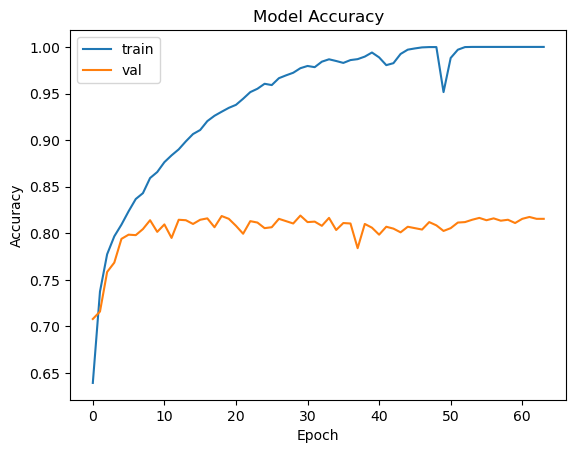

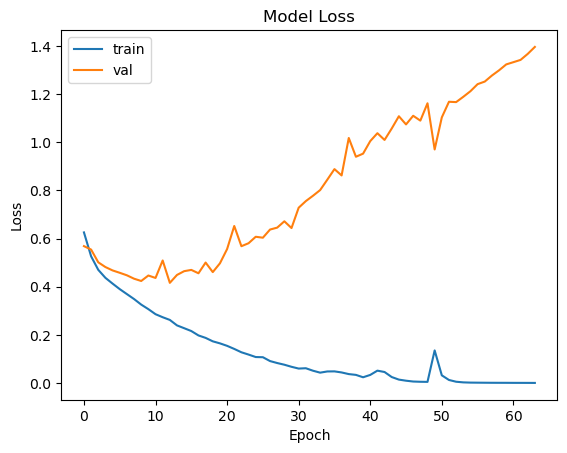

In [11]:
    assignment4b_3() # do not modify this line

In [12]:
    assignment4b_4() # do not modify this line

157/157 [==============================] - 2s 9ms/step - loss: 0.4138 - accuracy: 0.8202
Test accuracy at epoch 10 : 0.8202000260353088
157/157 [==============================] - 1s 8ms/step - loss: 0.4715 - accuracy: 0.8276
Test accuracy at epoch 20 : 0.8276000022888184
157/157 [==============================] - 1s 8ms/step - loss: 0.6293 - accuracy: 0.8274
Test accuracy at epoch 30 : 0.8274000287055969
157/157 [==============================] - 1s 8ms/step - loss: 0.9514 - accuracy: 0.8184
Test accuracy at epoch 40 : 0.8184000253677368
157/157 [==============================] - 1s 8ms/step - loss: 1.0102 - accuracy: 0.8104
Test accuracy at epoch 50 : 0.8104000091552734
157/157 [==============================] - 1s 9ms/step - loss: 1.3291 - accuracy: 0.8164
Test accuracy at epoch 60 : 0.8163999915122986


In [13]:
# Question 1 (5 points): If we set shuffle=False during the execution of model.fit() in Assignment 4b-2,
# which was previously set to shuffle=True, what impact will this have on the validation accuracy?
# Write down your answer here.
# 如果在執行model.fit()時將shuffle設置為False，表示每個epoch之前不會對訓練數據進行shuffle操作。
# 這可能會對驗證準確度產生影響。如果數據的分佈是有序的，例如按類別或時間順序排列，不進行shuffle操
# 作可能會導致模型在訓練中出現過擬合的情況，因為每個epoch模型都會在相同的順序下觀察到相同的數據點。
# 另一方面，如果數據分佈是隨機的，不進行shuffle操作可能會導致模型在訓練中收斂速度變慢，因為模型沒
# 有機會從不同的數據點中學習到更廣泛的特徵。因此，如果數據分佈是有序的，將shuffle設置為True可能會
# 提高驗證準確度，而如果數據分佈是隨機的，則不進行shuffle操作可能會導致驗證準確度下降。

In [14]:
# Question 2 (5 points): In Assignment 4b-4, what epoch yields the highest test accuracy, and what is the reason for this?
# Write down your answer here.
# 測試準確度最高的epoch是第20個epoch，測試準確度為0.8276。這可能是因為在第20個epoch時，模型在訓練
# 過程中達到了更好的泛化能力，而且沒有出現過擬合或欠擬合等問題。另外，也可能是在這個epoch時，模型學
# 習到了更好的特徵，或者在這個epoch時使用的優化器參數得到了更好的調整，從而提高了測試準確度。